In [1]:
import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(r'E:\Data_Sci\DATA\2nd_innings.csv')

In [2]:
df.head()

,Unnamed: 0,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,...,total_runs_CAN,player_dismissed,dismissal_kind,fielder,team_score,out_ind,wicket_fallen,total_runs_UK,venue,id_2
0,1,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,0,...,1,NaN,NaN,NaN,1,False,0,172,"Rajiv Gandhi International Stadium, Uppal",1
1,1,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,0,...,0,NaN,NaN,NaN,1,False,0,172,"Rajiv Gandhi International Stadium, Uppal",1
2,1,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,0,...,0,NaN,NaN,NaN,1,False,0,172,"Rajiv Gandhi International Stadium, Uppal",1
3,1,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,0,...,2,NaN,NaN,NaN,3,False,0,172,"Rajiv Gandhi International Stadium, Uppal",1
4,1,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,0,...,4,NaN,NaN,NaN,7,False,0,172,"Rajiv Gandhi International Stadium, Uppal",1


In [3]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72350 entries, 0 to 72349
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        72350 non-null  int64 
 1   batting_team      72350 non-null  object
 2   bowling_team      72350 non-null  object
 3   over              72350 non-null  int64 
 4   ball              72350 non-null  int64 
 5   batsman           72350 non-null  object
 6   non_striker       72350 non-null  object
 7   bowler            72350 non-null  object
 8   is_super_over     72350 non-null  int64 
 9   wide_runs         72350 non-null  int64 
 10  bye_runs          72350 non-null  int64 
 11  legbye_runs       72350 non-null  int64 
 12  noball_runs       72350 non-null  int64 
 13  penalty_runs      72350 non-null  int64 
 14  batsman_runs      72350 non-null  int64 
 15  extra_runs        72350 non-null  int64 
 16  total_runs_CAN    72350 non-null  int64 
 17  player_dismi

In [4]:
df.columns

Index(['Unnamed: 0', 'batting_team', 'bowling_team', 'over', 'ball', 'batsman',
       'non_striker', 'bowler', 'is_super_over', 'wide_runs', 'bye_runs',
       'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs',
       'extra_runs', 'total_runs_CAN', 'player_dismissed', 'dismissal_kind',
       'fielder', 'team_score', 'out_ind', 'wicket_fallen', 'total_runs_UK',
       'venue', 'id_2'],
      dtype='object')

In [5]:
df = df.rename(columns={"total_runs_CAN":"total_runs",
                                 "total_runs_UK":"total_score"})


In [6]:
df.columns


Index(['Unnamed: 0', 'batting_team', 'bowling_team', 'over', 'ball', 'batsman',
       'non_striker', 'bowler', 'is_super_over', 'wide_runs', 'bye_runs',
       'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs',
       'extra_runs', 'total_runs', 'player_dismissed', 'dismissal_kind',
       'fielder', 'team_score', 'out_ind', 'wicket_fallen', 'total_score',
       'venue', 'id_2'],
      dtype='object')

In [7]:
columns_to_remove = ['is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder','out_ind','non_striker','id_2','Unnamed: 0']
df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [8]:
df

,batting_team,bowling_team,over,ball,batsman,bowler,team_score,wicket_fallen,total_score,venue
0,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,A Nehra,1,0,172,"Rajiv Gandhi International Stadium, Uppal"
1,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,A Nehra,1,0,172,"Rajiv Gandhi International Stadium, Uppal"
2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,A Nehra,1,0,172,"Rajiv Gandhi International Stadium, Uppal"
3,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,A Nehra,3,0,172,"Rajiv Gandhi International Stadium, Uppal"
4,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,A Nehra,7,0,172,"Rajiv Gandhi International Stadium, Uppal"
...,...,...,...,...,...,...,...,...,...,...
72345,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,B Kumar,194,6,200,M Chinnaswamy Stadium
72346,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,B Kumar,194,7,200,M Chinnaswamy Stadium
72347,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,B Kumar,195,7,200,M Chinnaswamy Stadium
72348,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,B Kumar,196,7,200,M Chinnaswamy Stadium


In [9]:
df.reset_index(drop=True, inplace=True)

In [10]:
df = df[df['over']>=5]

In [11]:
df

,batting_team,bowling_team,over,ball,batsman,bowler,team_score,wicket_fallen,total_score,venue
25,Royal Challengers Bangalore,Sunrisers Hyderabad,5,1,CH Gayle,BCJ Cutting,43,0,172,"Rajiv Gandhi International Stadium, Uppal"
26,Royal Challengers Bangalore,Sunrisers Hyderabad,5,2,CH Gayle,BCJ Cutting,43,0,172,"Rajiv Gandhi International Stadium, Uppal"
27,Royal Challengers Bangalore,Sunrisers Hyderabad,5,3,CH Gayle,BCJ Cutting,43,0,172,"Rajiv Gandhi International Stadium, Uppal"
28,Royal Challengers Bangalore,Sunrisers Hyderabad,5,4,CH Gayle,BCJ Cutting,44,0,172,"Rajiv Gandhi International Stadium, Uppal"
29,Royal Challengers Bangalore,Sunrisers Hyderabad,5,5,CH Gayle,BCJ Cutting,44,0,172,"Rajiv Gandhi International Stadium, Uppal"
...,...,...,...,...,...,...,...,...,...,...
72345,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,B Kumar,194,6,200,M Chinnaswamy Stadium
72346,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,B Kumar,194,7,200,M Chinnaswamy Stadium
72347,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,B Kumar,195,7,200,M Chinnaswamy Stadium
72348,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,B Kumar,196,7,200,M Chinnaswamy Stadium


In [12]:
df['batting_team'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants'],
      dtype=object)

In [13]:
playing_teams=['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
       'Sunrisers Hyderabad','Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant']

In [14]:
df = df[(df['batting_team'].isin(playing_teams)) & (df['bowling_team'].isin(playing_teams))]

In [15]:
df["batting_team"].replace({"Deccan Chargers": "Sunrisers Hyderabad", "Rising Pune Supergiants": "Chennai Super Kings","Gujarat Lions":"Rajasthan Royals","Rising Pune Supergiant": "Chennai Super Kings"}, inplace=True)
df["bowling_team"].replace({"Deccan Chargers": "Sunrisers Hyderabad", "Rising Pune Supergiants": "Chennai Super Kings","Gujarat Lions":"Rajasthan Royals","Rising Pune Supergiant": "Chennai Super Kings"}, inplace=True)

In [16]:
df

,batting_team,bowling_team,over,ball,batsman,bowler,team_score,wicket_fallen,total_score,venue
25,Royal Challengers Bangalore,Sunrisers Hyderabad,5,1,CH Gayle,BCJ Cutting,43,0,172,"Rajiv Gandhi International Stadium, Uppal"
26,Royal Challengers Bangalore,Sunrisers Hyderabad,5,2,CH Gayle,BCJ Cutting,43,0,172,"Rajiv Gandhi International Stadium, Uppal"
27,Royal Challengers Bangalore,Sunrisers Hyderabad,5,3,CH Gayle,BCJ Cutting,43,0,172,"Rajiv Gandhi International Stadium, Uppal"
28,Royal Challengers Bangalore,Sunrisers Hyderabad,5,4,CH Gayle,BCJ Cutting,44,0,172,"Rajiv Gandhi International Stadium, Uppal"
29,Royal Challengers Bangalore,Sunrisers Hyderabad,5,5,CH Gayle,BCJ Cutting,44,0,172,"Rajiv Gandhi International Stadium, Uppal"
...,...,...,...,...,...,...,...,...,...,...
72345,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,B Kumar,194,6,200,M Chinnaswamy Stadium
72346,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,B Kumar,194,7,200,M Chinnaswamy Stadium
72347,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,B Kumar,195,7,200,M Chinnaswamy Stadium
72348,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,B Kumar,196,7,200,M Chinnaswamy Stadium


In [17]:
df['batting_team'].unique()

array(['Royal Challengers Bangalore', 'Chennai Super Kings',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Rajasthan Royals'],
      dtype=object)

In [18]:
encoded_df = pd.get_dummies(data=df, columns=['batting_team', 'bowling_team'])
encoded_df

,over,ball,batsman,bowler,team_score,wicket_fallen,total_score,venue,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,...,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,bowling_team_Kings XI Punjab,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad
25,5,1,CH Gayle,BCJ Cutting,43,0,172,"Rajiv Gandhi International Stadium, Uppal",0,0,...,1,0,0,0,0,0,0,0,0,1
26,5,2,CH Gayle,BCJ Cutting,43,0,172,"Rajiv Gandhi International Stadium, Uppal",0,0,...,1,0,0,0,0,0,0,0,0,1
27,5,3,CH Gayle,BCJ Cutting,43,0,172,"Rajiv Gandhi International Stadium, Uppal",0,0,...,1,0,0,0,0,0,0,0,0,1
28,5,4,CH Gayle,BCJ Cutting,44,0,172,"Rajiv Gandhi International Stadium, Uppal",0,0,...,1,0,0,0,0,0,0,0,0,1
29,5,5,CH Gayle,BCJ Cutting,44,0,172,"Rajiv Gandhi International Stadium, Uppal",0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72345,20,2,Sachin Baby,B Kumar,194,6,200,M Chinnaswamy Stadium,0,0,...,1,0,0,0,0,0,0,0,0,1
72346,20,3,Sachin Baby,B Kumar,194,7,200,M Chinnaswamy Stadium,0,0,...,1,0,0,0,0,0,0,0,0,1
72347,20,4,Iqbal Abdulla,B Kumar,195,7,200,M Chinnaswamy Stadium,0,0,...,1,0,0,0,0,0,0,0,0,1
72348,20,5,Sachin Baby,B Kumar,196,7,200,M Chinnaswamy Stadium,0,0,...,1,0,0,0,0,0,0,0,0,1


In [19]:
from sklearn.preprocessing import LabelEncoder
encoded_df['venue'] = LabelEncoder().fit_transform(encoded_df['venue'].tolist())
encoded_df['batsman'] = LabelEncoder().fit_transform(encoded_df['batsman'].tolist())
encoded_df['bowler'] = LabelEncoder().fit_transform(encoded_df['bowler'].tolist())

encoded_df

,over,ball,batsman,bowler,team_score,wicket_fallen,total_score,venue,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,...,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,bowling_team_Kings XI Punjab,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad
25,5,1,76,50,43,0,172,22,0,0,...,1,0,0,0,0,0,0,0,0,1
26,5,2,76,50,43,0,172,22,0,0,...,1,0,0,0,0,0,0,0,0,1
27,5,3,76,50,43,0,172,22,0,0,...,1,0,0,0,0,0,0,0,0,1
28,5,4,76,50,44,0,172,22,0,0,...,1,0,0,0,0,0,0,0,0,1
29,5,5,76,50,44,0,172,22,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72345,20,2,349,43,194,6,200,14,0,0,...,1,0,0,0,0,0,0,0,0,1
72346,20,3,349,43,194,7,200,14,0,0,...,1,0,0,0,0,0,0,0,0,1
72347,20,4,139,43,195,7,200,14,0,0,...,1,0,0,0,0,0,0,0,0,1
72348,20,5,349,43,196,7,200,14,0,0,...,1,0,0,0,0,0,0,0,0,1


In [20]:
#calculate and round off correlation matrix
corMat = (encoded_df.iloc[:,:9].corr()).values
corMat = np.around(corMat, decimals = 3)
print(corMat)

[[ 1.    -0.012 -0.027 -0.018  0.889  0.667  0.095  0.003  0.003]
 [-0.012  1.     0.005 -0.     0.049  0.038  0.005  0.002  0.003]
 [-0.027  0.005  1.     0.003 -0.023 -0.038  0.004  0.018  0.026]
 [-0.018 -0.     0.003  1.    -0.016 -0.005  0.003 -0.01   0.012]
 [ 0.889  0.049 -0.023 -0.016  1.     0.47   0.374  0.001  0.016]
 [ 0.667  0.038 -0.038 -0.005  0.47   1.    -0.146 -0.003 -0.053]
 [ 0.095  0.005  0.004  0.003  0.374 -0.146  1.     0.017  0.053]
 [ 0.003  0.002  0.018 -0.01   0.001 -0.003  0.017  1.    -0.029]
 [ 0.003  0.003  0.026  0.012  0.016 -0.053  0.053 -0.029  1.   ]]


In [21]:
feature_importance = (encoded_df.iloc[:,:9].corr()).iloc[:-1, -1].sort_values(ascending=False)
print('Features in Descending Order of Importance', list(feature_importance.index))

Features in Descending Order of Importance ['total_score', 'batsman', 'team_score', 'bowler', 'over', 'ball', 'venue', 'wicket_fallen']


In [22]:
encoded_df.columns

Index(['over', 'ball', 'batsman', 'bowler', 'team_score', 'wicket_fallen',
       'total_score', 'venue', 'batting_team_Chennai Super Kings',
       'batting_team_Delhi Daredevils', 'batting_team_Kings XI Punjab',
       'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians',
       'batting_team_Rajasthan Royals',
       'batting_team_Royal Challengers Bangalore',
       'batting_team_Sunrisers Hyderabad', 'bowling_team_Chennai Super Kings',
       'bowling_team_Delhi Daredevils', 'bowling_team_Kings XI Punjab',
       'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians',
       'bowling_team_Rajasthan Royals',
       'bowling_team_Royal Challengers Bangalore',
       'bowling_team_Sunrisers Hyderabad'],
      dtype='object')

In [23]:
# Rearranging the columns
encoded_df = encoded_df[['total_score', 'bowler', 'batsman', 'team_score', 'ball', 'over', 'wicket_fallen','batting_team_Chennai Super Kings', 'batting_team_Delhi Daredevils',
       'batting_team_Kings XI Punjab', 'batting_team_Kolkata Knight Riders',
       'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
       'batting_team_Royal Challengers Bangalore',
       'batting_team_Sunrisers Hyderabad', 'bowling_team_Chennai Super Kings',
       'bowling_team_Delhi Daredevils', 'bowling_team_Kings XI Punjab',
       'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians',
       'bowling_team_Rajasthan Royals',
       'bowling_team_Royal Challengers Bangalore',
       'bowling_team_Sunrisers Hyderabad']]

In [24]:
from sklearn.model_selection import train_test_split

from sklearn import metrics
y = encoded_df["total_score"]
X = encoded_df.drop(columns="total_score")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


In [25]:
from sklearn.model_selection import cross_val_score, KFold

In [26]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(verbosity=0) 
print(xgbr)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=0)


In [27]:
xgbr.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [28]:
score = xgbr.score(X_train, y_train)  
print("Training score: ", score)

Training score:  0.8260723852310172


In [29]:
y_pred1 = xgbr.predict(X_test)
y_pred1

array([134.53185 , 118.925476, 146.76022 , ..., 148.7475  , 116.46235 ,
       184.71646 ], dtype=float32)

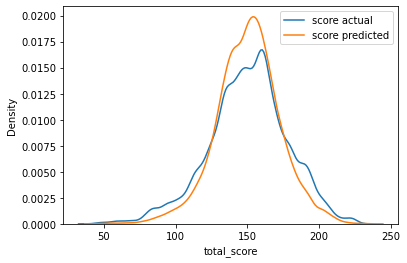

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(y_test,label='score actual')
sns.kdeplot(y_pred1,label='score predicted')
plt.legend()